# Chapter 10 

In [1]:
if(!require('dplyr')){
    install.packages('dplyr')
    library('dplyr')
}
if(!require('datasets')){
    install.packages('datasets')
    library('datasets')
}
if(!require('stats')){
    install.packages('stats')
    library('stats')
}


Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Exercise 3

### (a)

In this problem, you will perform K-means clustering manually, with K = 2, on a small example with n = 6 observations and p = 2 features. The observations are as follows.

In [2]:
#create dataframe of provided observations
df = data.frame(c(1,1,0,5,6,4),c(4,3,4,1,2,0))
#specify col names
colnames(df) = c('X1','X2')
head(df)

,X1,X2
,<dbl>,<dbl>
1,1,4
2,1,3
3,0,4
4,5,1
5,6,2
6,4,0


Plot the observations.

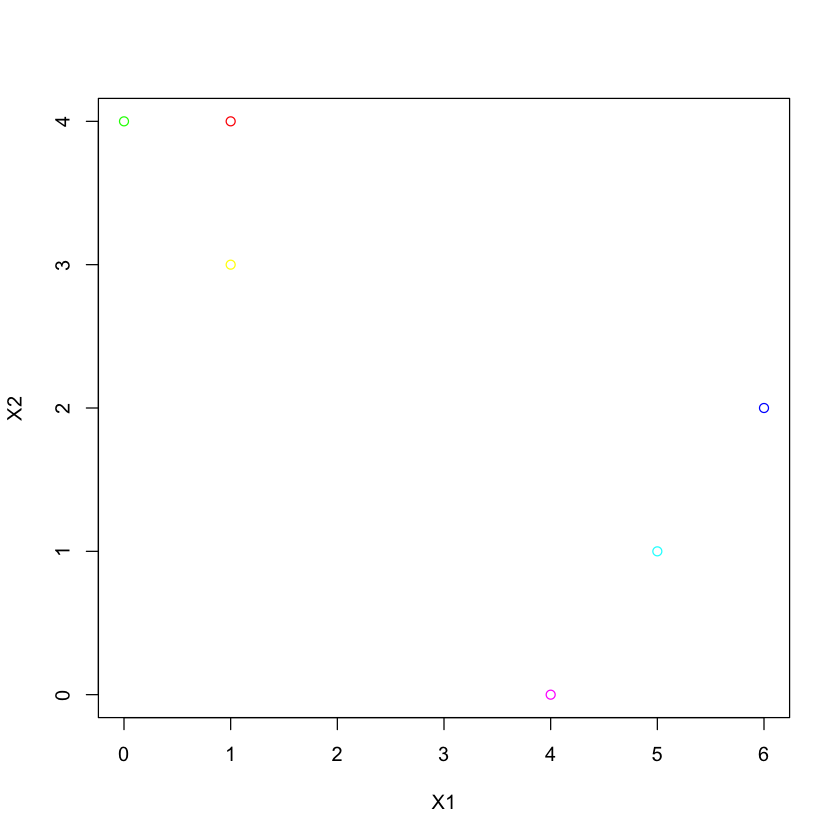

In [3]:
plot(df,col=rainbow(6))

### (b) 

Randomly assign a cluster label to each observation. You can use the `sample()` command in R to do this. Report the cluster labels for each observation.

In [4]:
set.seed(123)
#randomly generate labels with sample function
label=sample(1:6,6)
#append label column to df
df=cbind(df,label)
head(df)

,X1,X2,label
,<dbl>,<dbl>,<int>
1,1,4,3
2,1,3,6
3,0,4,2
4,5,1,4
5,6,2,5
6,4,0,1


### (c)

Compute the centroid for each cluster.

In [5]:
centroids=aggregate(.~label,df,mean)
colnames(centroids)=c('label',paste('Centroid',1:2))

data.frame(df[,-3],centroids[df$label,-1],label=df$label)

,X1,X2,Centroid.1,Centroid.2,label
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
3,1,4,1,4,3
6,1,3,1,3,6
2,0,4,0,4,2
4,5,1,5,1,4
5,6,2,6,2,5
1,4,0,4,0,1


### (d)

Assign each observation to the centroid to which it is closest, in terms of Euclidean distance. Report the cluster labels for each observation.

In [6]:
EuclideanDistance=function(v,z){
  sqrt(sum( (v-z)^2 ))
}

label=apply(df[,c(1,2)],1,
 function(x){
    dist=apply(centroids[df$labels,c(2,3)],1,function(y){ EuclideanDistance(x,y) })
    which.min(dist[dist>0])
  }
 )

data.frame(df[,-3],centroids[df$labels,-1],old.labels=df$label,new.labels=label)


ERROR: Error in data.frame(df[, -3], centroids[df$labels, -1], old.labels = df$label, : arguments imply differing number of rows: 6, 0


### (f)

In [ ]:
plot(df[,c(1,2)],col=rainbow(6)[df$label])

## Exercise 8

In Section 10.2.3, a formula for calculating PVE was given in Equa- tion 10.8. We also saw that the PVE can be obtained using the sdev output of the `prcomp()` function.

On the `USArrests` data, calculate PVE in two ways:

### (a)

Using the sdev output of the prcomp() function, as was done in
Section 10.2.3.

In [ ]:
data('USArrests')

In [ ]:
head(USArrests)

In [ ]:
#feature scaling USArrests

USArrests_scaled = scale(USArrests)
#PCA 
PCA=prcomp(USArrests_scaled)
variance=PCA$sdev^2


variance/sum(variance)

In [ ]:
plot(PCA)

### (b)

By applying Equation 10.8 directly. That is, use the prcomp() function to compute the principal component loadings. Then, use those loadings in Equation 10.8 to obtain the PVE.

In [ ]:
num=rowSums(apply(USArrests_scaled,1,function(x){ colSums(x %*% PCA$rotation )^2  }))
num

In [ ]:
denom=sum(rowSums(USArrests_scaled^2))
print(denom)
print(num/denom)

## Exercise 9 

Consider the USArrests data. We will now perform hierarchical clus- tering on the states.

### (a)

Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

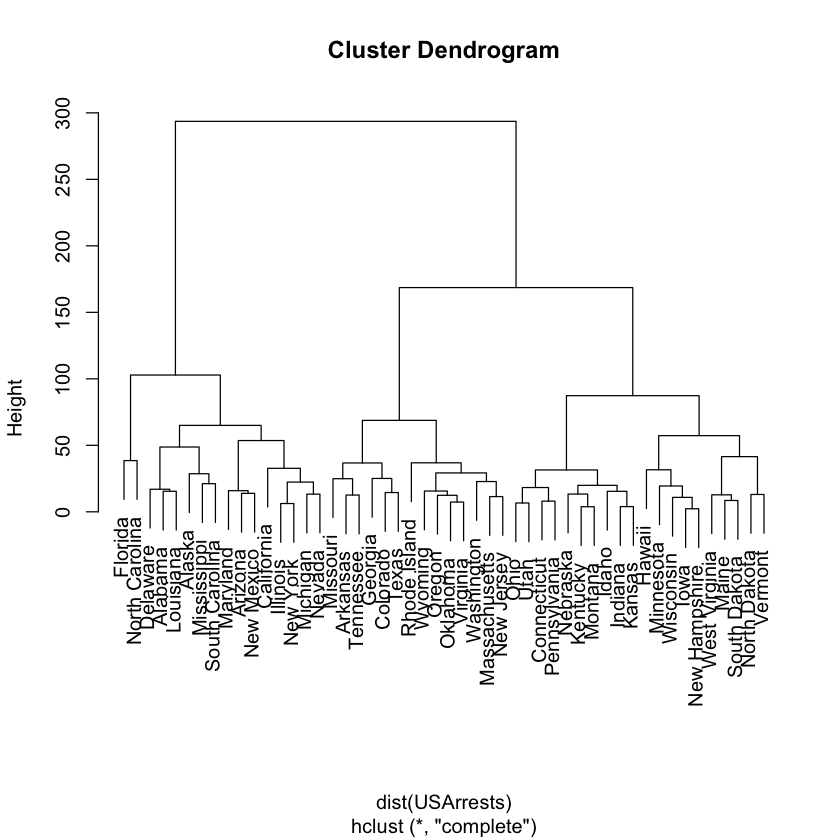

In [9]:
high_clust = hclust(dist(USArrests))

plot(high_clust)

### (b)

Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

In [10]:
high_clust_pruned = cutree(high_clust,k = 3) #three clusters specified a priori

high_clust_pruned = split(data.frame(names(high_clust_pruned),high_clust_pruned),as.factor(high_clust_pruned))

high_clust_pruned

,names.high_clust_pruned.,high_clust_pruned
,<chr>,<int>
Alabama,Alabama,1
Alaska,Alaska,1
Arizona,Arizona,1
California,California,1
Delaware,Delaware,1
Florida,Florida,1
Illinois,Illinois,1
Louisiana,Louisiana,1
Maryland,Maryland,1


### (c)

 Hierarchically cluster the states using complete linkage and Eu- clidean distance, after scaling the variables to have standard de- viation one.